# Loan Prediction Using Logistic Regression

### Importing Libraries

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [322]:
# reading data from the csv file
lc_data = pd.read_csv("LC2018_2019.csv",sep='|')

In [323]:
# top rows of given dataset
lc_data.head()

,loan_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,inc_verification_status,issue_date,purpose,zip_code,addr_state,application_type
0,1810063,23000,60 months,IT Manager,4 years,MORTGAGE,110000.0,Source Verified,Mar-18,debt_consolidation,347xx,FL,Individual
1,1810064,35000,36 months,Accountant,9 years,MORTGAGE,450000.0,Source Verified,Mar-18,debt_consolidation,070xx,NJ,Individual
2,1810065,20000,60 months,Carpenter,10+ years,RENT,92000.0,Not Verified,Mar-18,other,116xx,NY,Individual
3,1810066,7000,36 months,Police officer,8 years,MORTGAGE,57000.0,Verified,Mar-18,debt_consolidation,276xx,NC,Individual
4,1810067,15000,36 months,Clerk,2 years,MORTGAGE,86000.0,Not Verified,Mar-18,home_improvement,926xx,CA,Individual


### Feature Scaling

In [324]:
# feature scaling
lc_data = lc_data[['loan_id',
                  'loan_amnt',
                  'emp_title',
                  'emp_length',
                  'home_ownership',
                  'annual_inc',
                  'term']]

In [325]:
# total number of data on each column
lc_data.count()

loan_id           7556
loan_amnt         7556
emp_title         6644
emp_length        6908
home_ownership    7556
annual_inc        7556
term              7556
dtype: int64

##### Above information shows that emp_title and emp_length has less number of data due to null values as lc_data.count() does not count null values

### Visualisation and Exploratory Data Analysis

In [326]:
lc_data.isnull().sum()

loan_id             0
loan_amnt           0
emp_title         912
emp_length        648
home_ownership      0
annual_inc          0
term                0
dtype: int64

##### Above information shows the total null values in emp_title and emp_length


##### Now, we visualise the missing values using seaborn which is a data visualisation library in matplotlib

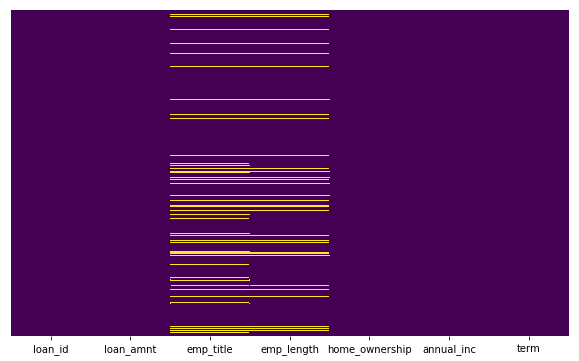

In [327]:
plt.figure(figsize=(10,6))
sns.heatmap(lc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### We have to fill the missing emp_length data instead of just dropping the column. So, we fill the missing values by assigning the average emp_length

In [328]:
lc_data.emp_length.unique()

array(['4 years', '9 years', '10+ years', '8 years', '2 years',
       '< 1 year', '1 year', nan, '3 years', '5 years', '6 years',
       '7 years'], dtype=object)

##### Data Pre-Processing

In [329]:
# Data preprocessing of emp_length

emp_length_mapping = {
    '< 1 year':0,
    '1 year':1,
    '2 years':2,
    '3 years':3,
    '4 years':4,
    '5 years':5,
    '6 years':6,
    '7 years':7,
    '8 years':8,
    '9 years':9,
    '10+ years':10,
    
}
lc_data.emp_length = lc_data.emp_length.map(emp_length_mapping)

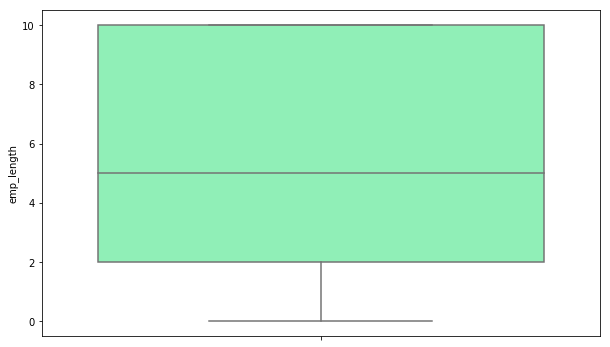

In [330]:
plt.figure(figsize=(10,6))
sns.boxplot(y='emp_length',data = lc_data, palette='rainbow')

In [331]:
# Assigining mean of employee length to null values in emp_length field
lc_data.emp_length = lc_data.emp_length.fillna(round(lc_data.emp_length.mean(),0))

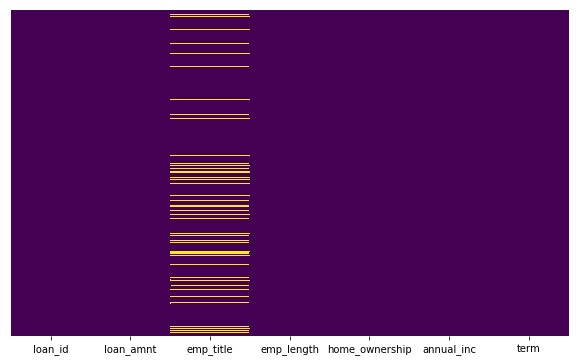

In [332]:
# Checking missing values are filled or not
plt.figure(figsize=(10,6))
sns.heatmap(lc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Above heatmap shows that the emp_length null values have been filled up by the mean of employee length. We still have null values in emp_title

In [333]:
lc_data.isnull().sum()

loan_id             0
loan_amnt           0
emp_title         912
emp_length          0
home_ownership      0
annual_inc          0
term                0
dtype: int64

In [334]:
# Dropping emp_title null values
lc_data = lc_data.dropna()

In [335]:
lc_data.isnull().sum()

loan_id           0
loan_amnt         0
emp_title         0
emp_length        0
home_ownership    0
annual_inc        0
term              0
dtype: int64

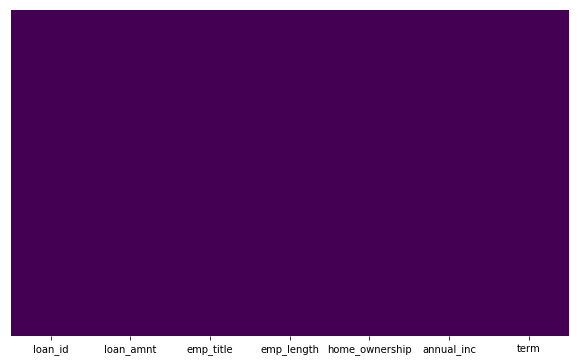

In [336]:
# Checking missing values
plt.figure(figsize=(10,6))
sns.heatmap(lc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [337]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 0 to 7555
Data columns (total 7 columns):
loan_id           6644 non-null int64
loan_amnt         6644 non-null int64
emp_title         6644 non-null object
emp_length        6644 non-null float64
home_ownership    6644 non-null object
annual_inc        6644 non-null float64
term              6644 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 415.2+ KB


##### Above information shows that emp_title, home_ownership, term are object data types which needs to be convert into integer

In [338]:
lc_data.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,term
0,1810063,23000,IT Manager,4.0,MORTGAGE,110000.0,60 months
1,1810064,35000,Accountant,9.0,MORTGAGE,450000.0,36 months
2,1810065,20000,Carpenter,10.0,RENT,92000.0,60 months
3,1810066,7000,Police officer,8.0,MORTGAGE,57000.0,36 months
4,1810067,15000,Clerk,2.0,MORTGAGE,86000.0,36 months


##### changing data type of home_ownership

In [339]:
lc_data.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [340]:
lc_data.home_ownership.value_counts()

MORTGAGE    3253
RENT        2681
OWN          710
Name: home_ownership, dtype: int64

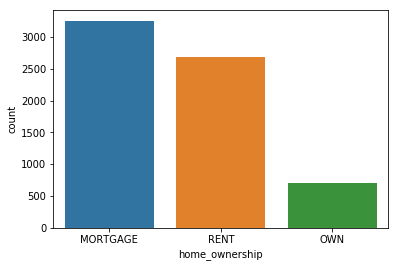

In [341]:
sns.countplot(x='home_ownership',data=lc_data)

In [342]:
# encoding categorical values in home_ownership

home_ownership_mapping = {
    'MORTGAGE':1,
    'RENT':2,
    'OWN':3
}
lc_data.home_ownership = lc_data.home_ownership.map(home_ownership_mapping)

In [343]:
lc_data.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,term
0,1810063,23000,IT Manager,4.0,1,110000.0,60 months
1,1810064,35000,Accountant,9.0,1,450000.0,36 months
2,1810065,20000,Carpenter,10.0,2,92000.0,60 months
3,1810066,7000,Police officer,8.0,1,57000.0,36 months
4,1810067,15000,Clerk,2.0,1,86000.0,36 months


##### changing data type of emp_title

In [344]:
lc_data.emp_title.unique()

array(['IT Manager', 'Accountant', 'Carpenter', 'Police officer', 'Clerk',
       'Security Officer', 'Supervisor', 'Realtor', 'Sales Manager',
       'Electrician', 'Chef', 'Attorney', 'Teacher', 'Engineer', 'Nurse',
       'Mechanic', 'Truck Driver', 'Bartender', 'Office Manager',
       'Principal'], dtype=object)

In [345]:
lc_data.emp_title.value_counts()

Security Officer    792
Chef                521
Accountant          516
Supervisor          452
Police officer      409
Electrician         327
Nurse               321
Carpenter           315
Engineer            308
Attorney            304
Office Manager      303
Sales Manager       301
Truck Driver        276
Realtor             268
Clerk               266
Mechanic            266
Principal           207
Bartender           205
IT Manager          159
Teacher             128
Name: emp_title, dtype: int64

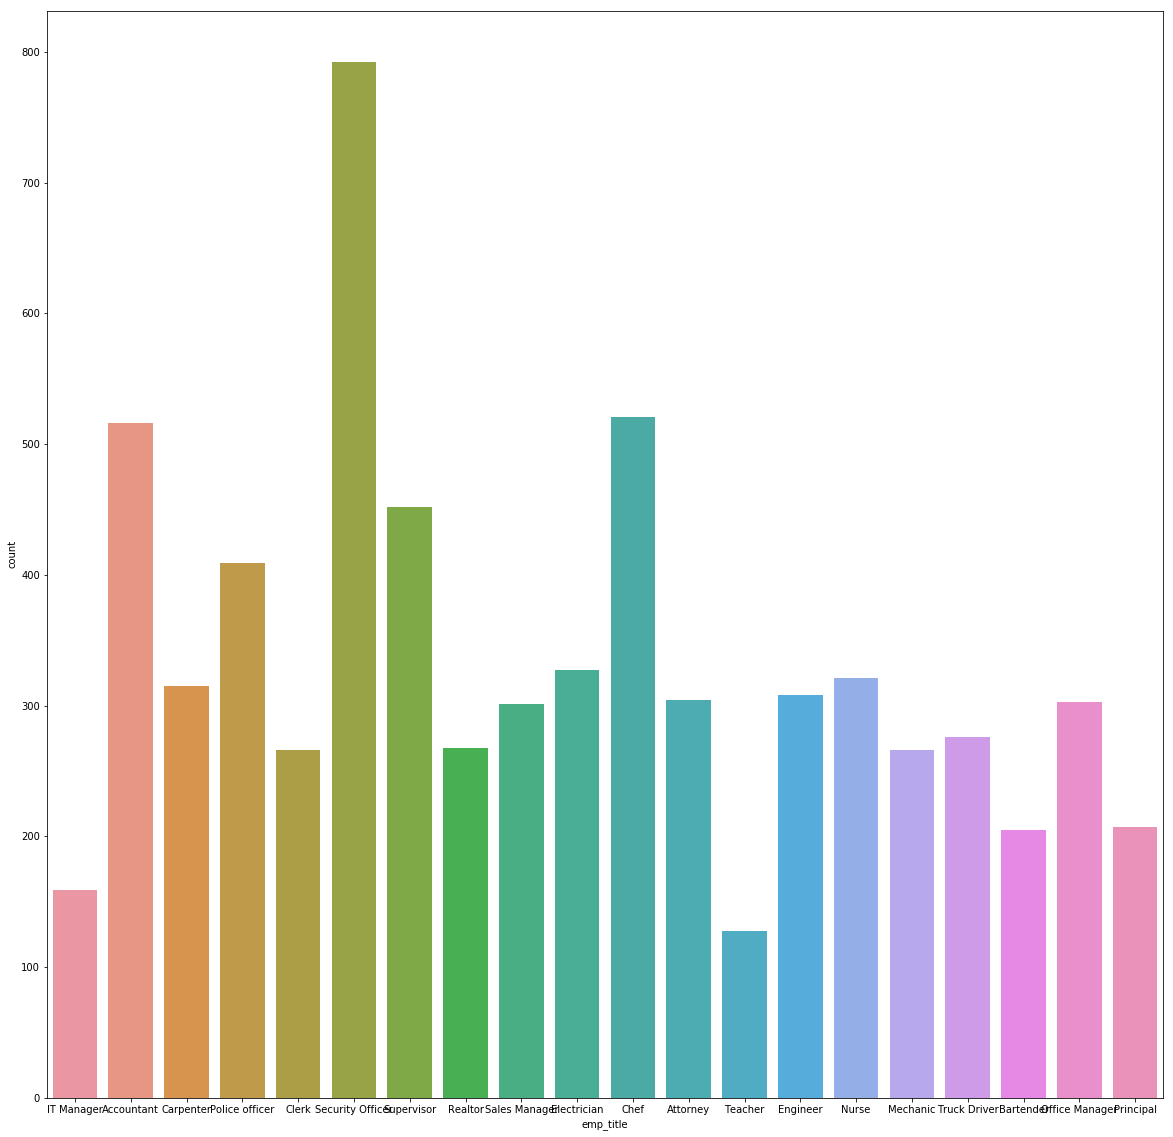

In [346]:
plt.figure(figsize=(20, 20))
sns.countplot(x='emp_title',data=lc_data)

In [347]:
# Encoding categorical values in emp_title

emp_title_mapping = {
    'Truck Driver': 1,
    'Electrician': 2,
    'Carpenter': 3,
    'Attorney': 4,
    'Sales Manager': 5,
    'Teacher': 6,
    'Nurse': 7,
    'Bartender': 8,
    'Engineer': 9,
    'Supervisor': 10,
    'Clerk': 11,
    'Accountant': 13,
    'IT Manager': 13,
    'Police officer': 14,
    'Realtor': 15,
    'Office Manager': 16,
    'Mechanic': 17,
    'Chef': 18,
    'Security Officer': 19,
    'Principal': 20
}

lc_data.emp_title = lc_data.emp_title.map(emp_title_mapping)

In [348]:
lc_data.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,term
0,1810063,23000,13,4.0,1,110000.0,60 months
1,1810064,35000,13,9.0,1,450000.0,36 months
2,1810065,20000,3,10.0,2,92000.0,60 months
3,1810066,7000,14,8.0,1,57000.0,36 months
4,1810067,15000,11,2.0,1,86000.0,36 months


##### changing data type of term

In [349]:
lc_data.term.unique()

array(['60 months', '36 months'], dtype=object)

In [350]:
lc_data.term.value_counts()

36 months    4433
60 months    2211
Name: term, dtype: int64

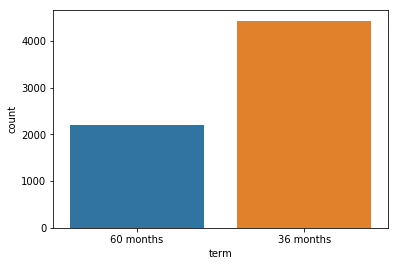

In [351]:
sns.countplot(x='term',data=lc_data)

In [352]:
# Encoding categorical values in term

term_mapping = {
    '36 months' : 0,
    '60 months'  : 1
    
}
lc_data.term = lc_data.term.map(term_mapping)


In [353]:
lc_data.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,term
0,1810063,23000,13,4.0,1,110000.0,1
1,1810064,35000,13,9.0,1,450000.0,0
2,1810065,20000,3,10.0,2,92000.0,1
3,1810066,7000,14,8.0,1,57000.0,0
4,1810067,15000,11,2.0,1,86000.0,0


In [354]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 0 to 7555
Data columns (total 7 columns):
loan_id           6644 non-null int64
loan_amnt         6644 non-null int64
emp_title         6644 non-null int64
emp_length        6644 non-null float64
home_ownership    6644 non-null int64
annual_inc        6644 non-null float64
term              6644 non-null int64
dtypes: float64(2), int64(5)
memory usage: 735.2 KB


##### Above info shows that ObjectData types are changed into integer

In [355]:
# counting total rows in the dataset
count_row = lc_data.shape[0]

In [356]:
count_row

6644

In [357]:
# Exporting cleaned datasets to new csv file 
lc_data.to_csv('clean_lc_data_02_may_2019.csv', index = False)

### Data Modelling

#### Importing Cleaned datasets

In [358]:
lc_data = pd.read_csv('clean_lc_data_02_may_2019.csv')

In [359]:
lc_data.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,term
0,1810063,23000,13,4.0,1,110000.0,1
1,1810064,35000,13,9.0,1,450000.0,0
2,1810065,20000,3,10.0,2,92000.0,1
3,1810066,7000,14,8.0,1,57000.0,0
4,1810067,15000,11,2.0,1,86000.0,0


In [360]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6644 entries, 0 to 6643
Data columns (total 7 columns):
loan_id           6644 non-null int64
loan_amnt         6644 non-null int64
emp_title         6644 non-null int64
emp_length        6644 non-null float64
home_ownership    6644 non-null int64
annual_inc        6644 non-null float64
term              6644 non-null int64
dtypes: float64(2), int64(5)
memory usage: 363.4 KB


##### Splitting test and training set

In [372]:
# data are loaded into cols
cols = lc_data.columns

# drop term column from the cols
train_cols = cols.drop('term')

# assigning feature for model, by removing term column
features = lc_data[train_cols]

# assigining target to response variable
target = lc_data['term']

# splitting training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1)

In [373]:
# creating LogisticRegression model
from sklearn.linear_model import LogisticRegression 

lr  = LogisticRegression(class_weight=0.4, solver = 'lbfgs', max_iter = 1000) 

lr.fit(X_train, y_train) 

prediction_train = lr.predict(X_train)

print(lr.score(X_train,y_train))

0.709817695266767


In [374]:
prediction_test = lr.predict(X_test)

# print(prediction_test)

print(lr.score(X_test,y_test))

0.7037593984962406


### Prediction

In [375]:
# testing set
X_test.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc
1692,1820492,40000,16,4.0,2,68290.0
6284,1911189,5000,8,3.0,2,46000.0
66,1810135,15000,10,6.0,2,96000.0
3089,1830524,15000,14,5.0,2,40000.0
5667,1841464,10000,4,2.0,1,120000.0


In [376]:
# Exporting testing datasets to new csv file 
X_test.to_csv('clean_testing_set_02_may_2019.csv', index = False)

In [377]:
# Read Testing Datasets
testing_data = pd.read_csv('clean_testing_set_02_may_2019.csv',sep=',')

In [378]:
testing_data.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc
0,1820492,40000,16,4.0,2,68290.0
1,1911189,5000,8,3.0,2,46000.0
2,1810135,15000,10,6.0,2,96000.0
3,1830524,15000,14,5.0,2,40000.0
4,1841464,10000,4,2.0,1,120000.0


In [379]:
predicted_test = pd.DataFrame(prediction_test)

In [380]:
# adding Prediction column 
testing_data['Prediction'] = predicted_test

In [381]:
testing_data.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,Prediction
0,1820492,40000,16,4.0,2,68290.0,1
1,1911189,5000,8,3.0,2,46000.0,0
2,1810135,15000,10,6.0,2,96000.0,0
3,1830524,15000,14,5.0,2,40000.0,0
4,1841464,10000,4,2.0,1,120000.0,0


In [382]:
test_data_frame = testing_data[['loan_id','Prediction']]

In [383]:
test_data_frame.head()

,loan_id,Prediction
0,1820492,1
1,1911189,0
2,1810135,0
3,1830524,0
4,1841464,0


In [384]:
# Exporting predicted test set to new csv file 
test_data_frame.to_csv('predicted_test_set_02_may_2019.csv', index = False)

In [385]:
# training set
X_train.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc
2080,1820910,7200,14,10.0,1,72000.0
2573,1821447,15000,2,10.0,1,75000.0
4225,1840263,16000,19,5.0,1,138300.0
2325,1821184,10000,18,2.0,1,34500.0
1016,1810821,23000,1,2.0,1,105000.0


In [386]:
# Exporting training datasets to new csv file 
X_train.to_csv('clean_training_set_02_may_2019.csv', index = False)

In [387]:
training_data = pd.read_csv('clean_training_set_02_may_2019.csv',sep=',')

In [388]:
training_data.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc
0,1820910,7200,14,10.0,1,72000.0
1,1821447,15000,2,10.0,1,75000.0
2,1840263,16000,19,5.0,1,138300.0
3,1821184,10000,18,2.0,1,34500.0
4,1810821,23000,1,2.0,1,105000.0


In [389]:
predicted_train = pd.DataFrame(prediction_train)

In [390]:
# adding Prediction column
training_data['Prediction'] = predicted_train

In [391]:
training_data.head()

,loan_id,loan_amnt,emp_title,emp_length,home_ownership,annual_inc,Prediction
0,1820910,7200,14,10.0,1,72000.0,0
1,1821447,15000,2,10.0,1,75000.0,0
2,1840263,16000,19,5.0,1,138300.0,0
3,1821184,10000,18,2.0,1,34500.0,0
4,1810821,23000,1,2.0,1,105000.0,0


In [392]:
train_data_frame = training_data[['loan_id','Prediction']]

In [393]:
train_data_frame.head()

,loan_id,Prediction
0,1820910,0
1,1821447,0
2,1840263,0
3,1821184,0
4,1810821,0


In [394]:
# Exporting predicted train set to new csv file 
train_data_frame.to_csv('predicted_train_set_02_may_2019.csv', index = False)